# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Giulia Passarelli </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
hemisferio=[]
for i in df["Latitude"]:
    if i>0:
        hemisferio.append("Norte")
    else:
        hemisferio.append("Sul")
        
df["Hemisferio"] = hemisferio

df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisferio
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

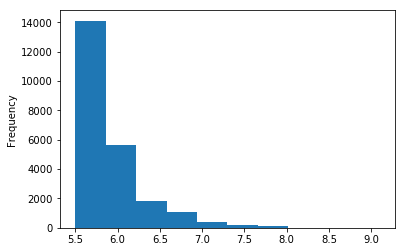

In [5]:
df["Magnitude"].plot.hist(alpha=1)

O gráfico representa a frequência de magnitude dos terremotos, assim, interpreta-se que magnitudes de maior frequência se localizam na faixa de 5.5 a 6 e, conforme esse valor aumenta, a frequência diminui.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [6]:
expon.fit(df["Magnitude"], loc=0, scale=1)

(5.4999999994058708, 0.38254168278816081)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

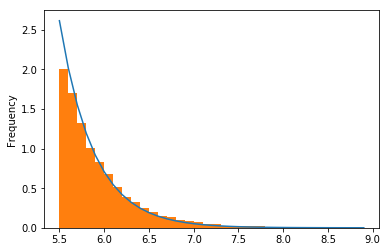

In [7]:
x = np.arange(5.5,9,0.1)
plt.plot(x,expon.pdf(x,loc=5.4999999994058708,scale=0.38254168278816081))

df["Magnitude"].plot.hist(bins=x,normed=True,alpha=1)

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
tabela = pd.crosstab(df.Hemisferio,df.Type, margins=True, dropna=True, normalize=True)
tabela

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisferio,,,,,
Norte,0.447121,0.000085,0.006279,0.000000,0.453485
Sul,0.545191,0.000085,0.001196,0.000043,0.546515
All,0.992312,0.000171,0.007475,0.000043,1.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

A probabilidade de ocorrer um terremoto no hemisfério norte é 44,71%, aproximadamente.

Explique o seu raciocínio

Probabilidade de ocorrer um terremoto no hemisfério Norte = P(Norte ∩ Terremoto)

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

P(Nuclear Explosion|Norte) = P(Norte ∩ Nuclear Explosion) / P(Norte)

In [9]:
P = (0.006279/0.453485)*100
print('A probabilidade de ter sido explosão nuclear dado que aconteceu no Norte é de:{}%'.format(P))

A probabilidade de ter sido explosão nuclear dado que aconteceu no Norte é de:1.3846102958201483%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

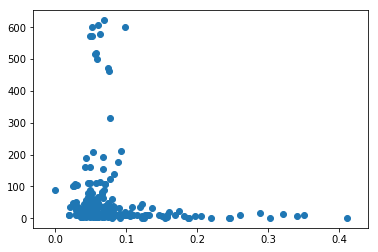

In [10]:
plt.scatter(df["Magnitude Error"],df["Depth"])

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [11]:
df['Magnitude Error'].corr(df['Depth'])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

A correlação é a porcentagem de relação entre as caracteristicas analisadas. Como o valor está próximo de zero, a correlação está baixa por conta das variáveis serem praticamente independentes e, por estar negativa, percebemos que os valores analisados são inversamente proporcionais

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [12]:
df["Latitude"].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [13]:
df["Longitude"].describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

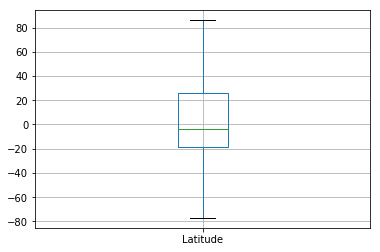

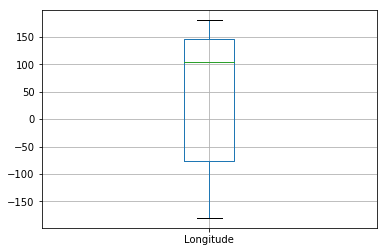

In [14]:
df["Latitude"].plot.box(grid=True)
plt.figure();
df["Longitude"].plot.box(grid=True)

 ## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [23]:
df2 = df[df['Magnitude Type'].isin(['MB'])]

tabela = pd.crosstab(df2.Hemisferio,df["Magnitude Type"], margins=True, dropna=True, normalize=True)
tabela

Magnitude Type,MB,All
Hemisferio,,
Norte,0.447753,0.447753
Sul,0.552247,0.552247
All,1.000000,1.000000


A chance de um *Magnitude Type* `MB` ocorrer no hemisfério Sul é maior do que no Norte

In [27]:
df2 = df[df['Type'].isin(['Nuclear Explosion'])]

tabela = pd.crosstab(df2.Hemisferio,df["Type"], margins=True, dropna=True, normalize=True)
tabela

Type,Nuclear Explosion,All
Hemisferio,,
Norte,0.84,0.84
Sul,0.16,0.16
All,1.00,1.00


A chance de um *Type* `Nuclear Explosion` ocorrer no hemisfério Norte é maior do que no Sul